In [2]:
import pandas as pd
import seaborn as sns

In [3]:
dados = pd.read_csv("tips.csv")

In [4]:
dados.head()

,total_bill,tip,dessert,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [5]:
renomear = {
    'total_bill': 'Valor_da_conta', 
    'tip': 'gorjeta', 
    'dessert' : 'sobremesa', 
    'day': 'dia_da_semana', 
    'time': 'horario_do_dia', 
    'size': 'total_de_pessoas'
}

In [6]:
gorjetas = dados.rename(columns = renomear)

In [7]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,total_de_pessoas
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [8]:
gorjetas.sobremesa.unique()

array(['No', 'Yes'], dtype=object)

In [9]:
sim_nao = {
    'No': 'Não',
    'Yes' : 'Sim'
}

In [10]:
gorjetas.sobremesa = gorjetas.sobremesa.map(sim_nao)

In [11]:
gorjetas.dia_da_semana.unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [12]:
dias_semanas = {'Sun': 'Domingo', 'Sat': 'Sábado', 'Thur': 'Quinta', 'Fri':'Sexta'}

In [13]:
gorjetas.dia_da_semana = gorjetas.dia_da_semana.map(dias_semanas)
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Dinner,2
1,10.34,1.66,Não,Domingo,Dinner,3
2,21.01,3.50,Não,Domingo,Dinner,3
3,23.68,3.31,Não,Domingo,Dinner,2
4,24.59,3.61,Não,Domingo,Dinner,4


In [14]:
gorjetas.horario_do_dia.unique()

array(['Dinner', 'Lunch'], dtype=object)

In [15]:
hora = {'Dinner': 'Jantar',
        'Lunch':'Almoço'}
gorjetas.horario_do_dia = gorjetas.horario_do_dia.map(hora)


In [16]:
gorjetas.head()

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,total_de_pessoas
0,16.99,1.01,Não,Domingo,Jantar,2
1,10.34,1.66,Não,Domingo,Jantar,3
2,21.01,3.50,Não,Domingo,Jantar,3
3,23.68,3.31,Não,Domingo,Jantar,2
4,24.59,3.61,Não,Domingo,Jantar,4


#Análise 1 - Valor da conta e gorjetas

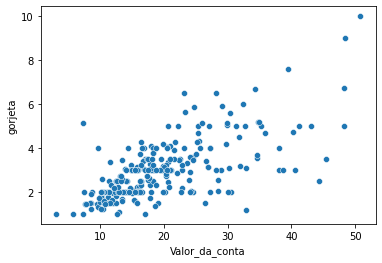

In [17]:
sns.scatterplot(x = 'Valor_da_conta', y= "gorjeta", data = gorjetas)

### Visulamente, o valor da gorjeta aumenta conforme aumenta o valor da conta

In [18]:
print('A base de dados contêm {} registros' .format(gorjetas.shape[0]))
print('Registros não nulos')
gorjetas.count()

A base de dados contêm 244 registros
Registros não nulos


Valor_da_conta      244
gorjeta             244
sobremesa           244
dia_da_semana       244
horario_do_dia      244
total_de_pessoas    244
dtype: int64

In [19]:
gorjetas['porcentagem'] = (gorjetas['gorjeta'] / gorjetas['Valor_da_conta']).round(2)

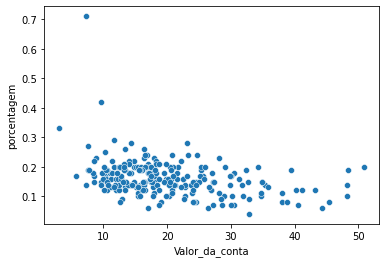

In [20]:
porcentagem_gorjeta = sns.scatterplot(x = 'Valor_da_conta', y= 'porcentagem', data = gorjetas)

## Visualmente a gorgeta não é proporcional ao valor da gorjeta

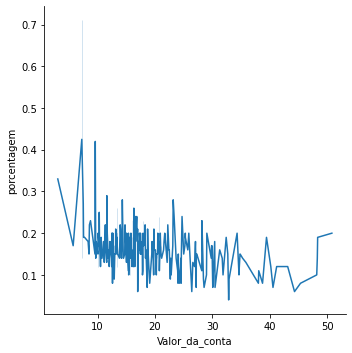

In [21]:
porcentagem_conta_linha = sns.relplot(x = 'Valor_da_conta', y = 'porcentagem', kind='line',  data = gorjetas)

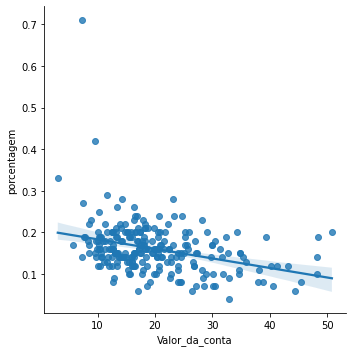

In [22]:
sns.lmplot(x='Valor_da_conta', y='porcentagem', data=gorjetas )

In [23]:
gorjetas[gorjetas.sobremesa == 'Sim'].describe()

,Valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,93.000000,93.000000,93.000000,93.000000
mean,20.756344,3.008710,2.408602,0.163226
std,9.832154,1.401468,0.810751,0.085060
min,3.070000,1.000000,1.000000,0.040000
25%,13.420000,2.000000,2.000000,0.110000
50%,17.920000,3.000000,2.000000,0.150000
75%,26.860000,3.680000,3.000000,0.200000
max,50.810000,10.000000,5.000000,0.710000


In [24]:
gorjetas[gorjetas.sobremesa == 'Não'].describe()

,Valor_da_conta,gorjeta,total_de_pessoas,porcentagem
count,151.000000,151.000000,151.000000,151.000000
mean,19.188278,2.991854,2.668874,0.159536
std,8.255582,1.377190,1.017984,0.039889
min,7.250000,1.000000,1.000000,0.060000
25%,13.325000,2.000000,2.000000,0.140000
50%,17.590000,2.740000,2.000000,0.160000
75%,22.755000,3.505000,3.000000,0.185000
max,48.330000,9.000000,6.000000,0.290000


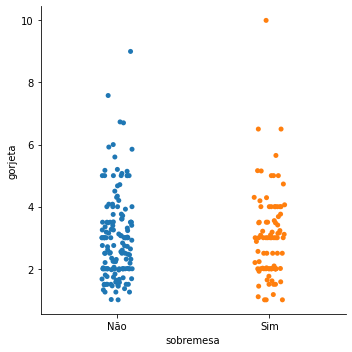

In [25]:
sns.catplot(x='sobremesa', y='gorjeta', data=gorjetas)

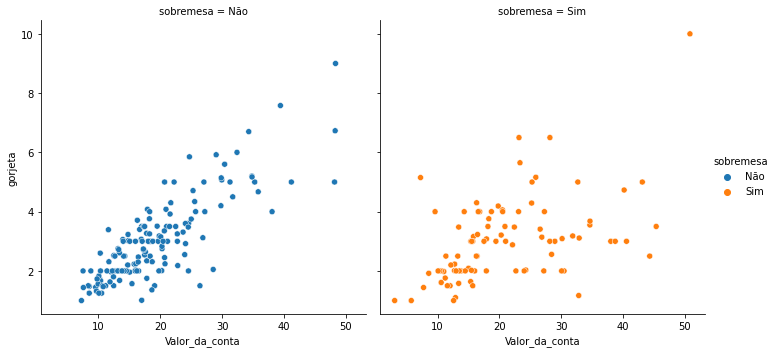

In [26]:
sns.relplot (x='Valor_da_conta', y='gorjeta', hue = 'sobremesa', col = 'sobremesa', data=gorjetas)

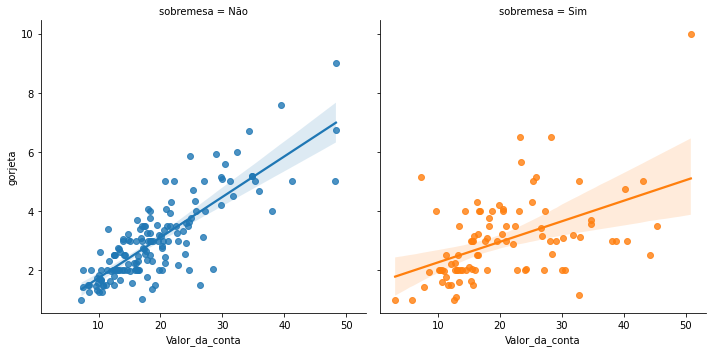

In [27]:
sns.lmplot (x='Valor_da_conta', y='gorjeta', hue = 'sobremesa', col = 'sobremesa', data=gorjetas)

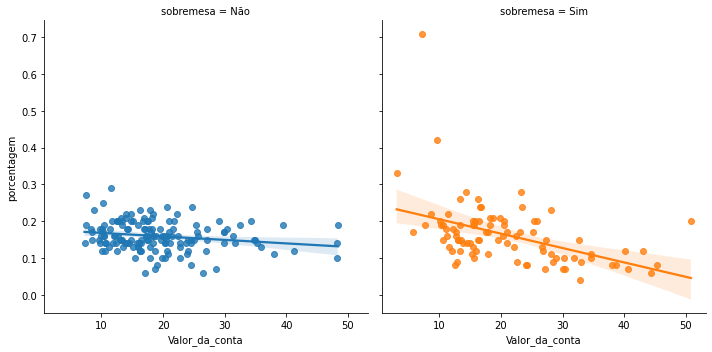

In [28]:
sns.lmplot (x='Valor_da_conta', y='porcentagem', hue = 'sobremesa', col = 'sobremesa', data=gorjetas)

## Visualmente, existe uma diferença no valor da gorgeta daqueles que pediram sobremesa e que não pediram sobremesa

# Teste de Hipótese



**H<sup>null</sup>**

> ** A distribuição da taxa da gorgeta é a mesma nos dois grupos **

**H<sup>alt</sup>**

> ** A distribuição da taxa da gorgeta não é a mesma nos dois grupos **


In [29]:
from scipy.stats import ranksums    

In [30]:
sobremesa = gorjetas.query("sobremesa == 'Sim'"). porcentagem

In [31]:
sem_sombremesa = gorjetas.query("sobremesa == 'Não'"). porcentagem

In [32]:
r = ranksums (sobremesa, sem_sombremesa)

In [33]:
print('O valor do p-value é {}' .format(r.pvalue))

O valor do p-value é 0.5266635660124415


**H<sup>null</sup>**

> ** A distribuição da taxa da gorgeta é a mesma nos dois grupos **

# Analise 2 - Dia da Semana

In [34]:
gorjetas.head(2)

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16


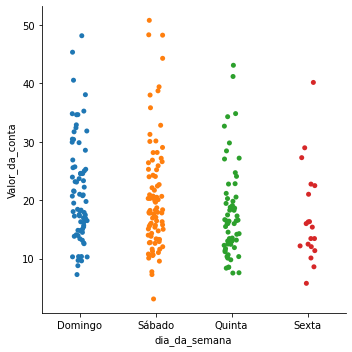

In [35]:
sns.catplot(x = 'dia_da_semana', y= 'Valor_da_conta', data = gorjetas)

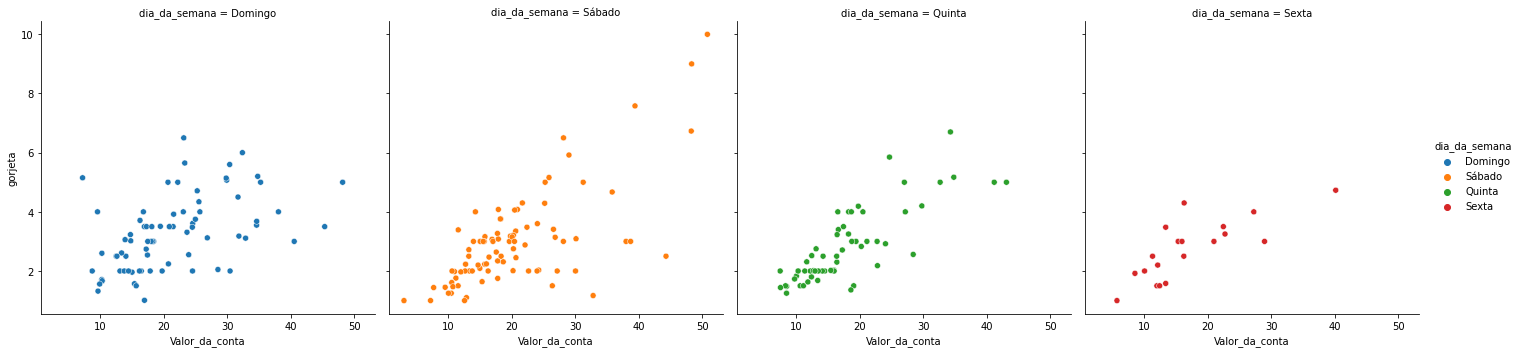

In [36]:
sns.relplot(x = 'Valor_da_conta', y='gorjeta', hue='dia_da_semana', col = 'dia_da_semana', data = gorjetas)

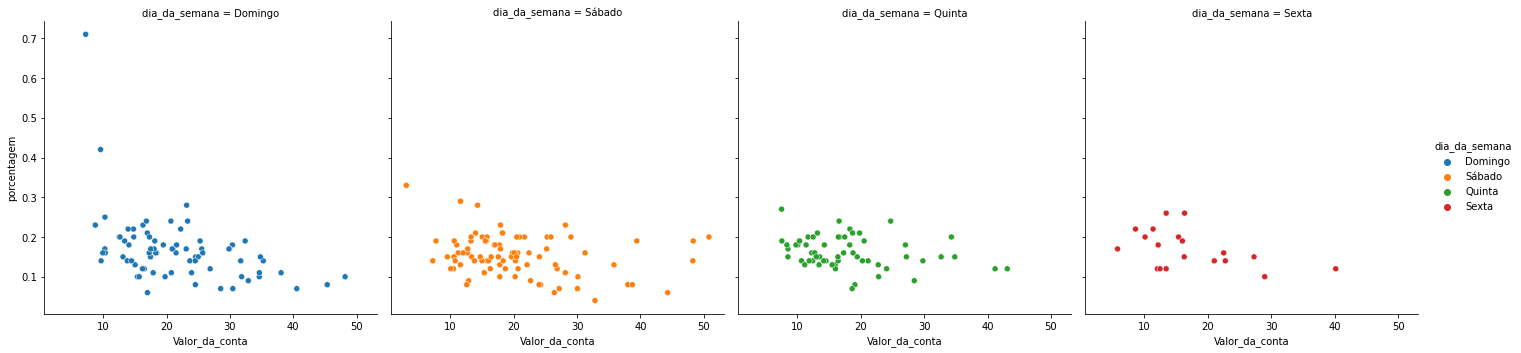

In [37]:
sns.relplot(x = 'Valor_da_conta', y='porcentagem', hue='dia_da_semana', col = 'dia_da_semana', data = gorjetas)

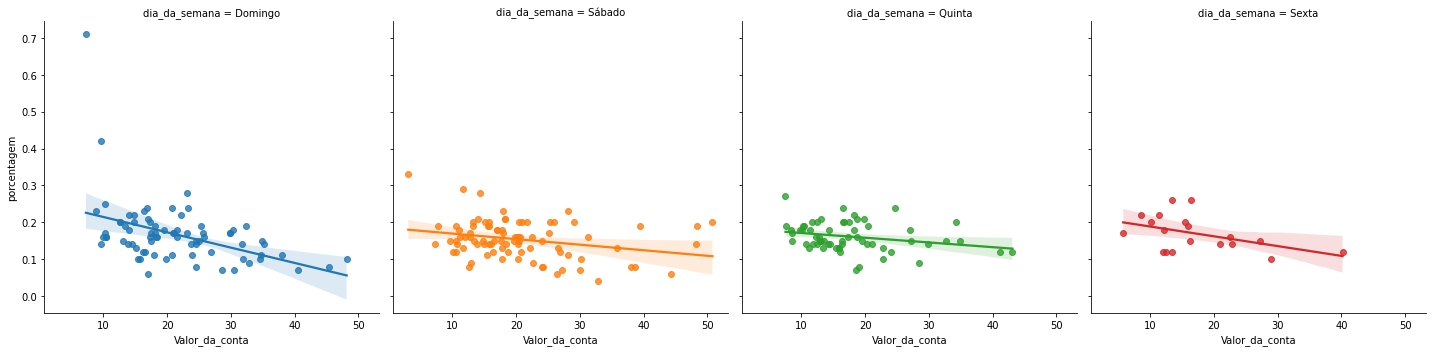

In [38]:
sns.lmplot(x = 'Valor_da_conta', y='porcentagem', hue='dia_da_semana', col = 'dia_da_semana', data = gorjetas)

In [39]:
media_gorjeta_geral = gorjetas.gorjeta.mean()

In [40]:
print('A média geral das gorjetas é de {}' .format(media_gorjeta_geral))

A média geral das gorjetas é de 2.99827868852459


In [41]:
print('Média das gorjetas por dia da semana')
gorjetas.groupby('dia_da_semana').mean()[['Valor_da_conta', 'gorjeta', 'porcentagem']]

Média das gorjetas por dia da semana


,Valor_da_conta,gorjeta,porcentagem
dia_da_semana,,,
Domingo,21.410000,3.255132,0.166974
Quinta,17.682742,2.771452,0.161129
Sexta,17.151579,2.734737,0.169474
Sábado,20.441379,2.993103,0.153678


In [42]:
print ('Frequência dos dias')

gorjetas.dia_da_semana.value_counts()

Frequência dos dias


Sábado     87
Domingo    76
Quinta     62
Sexta      19
Name: dia_da_semana, dtype: int64

# Teste de hipótese

**H<sup>null</sup>**

> A distribuição do valor da conta é igual no Sábado e no domingo **

**H<sup>alt</sup>**

>  A distribuição do valor da conta não é igual no Sábado e no domingo **


In [43]:
valor_conta_domingo = gorjetas.query("dia_da_semana == 'Domingo'").Valor_da_conta

In [44]:
valor_conta_sabado = gorjetas.query("dia_da_semana == 'Sábado'").Valor_da_conta

In [45]:
r2 = ranksums(valor_conta_domingo, valor_conta_sabado)
print("O valor do p-value é {}" .format (r2.pvalue))

O valor do p-value é 0.3576728477868443




**H<sup>null</sup>**

> A distribuição do valor da conta é igual no Sábado e no domingo **


# Analise 3 - Hora do Dia

In [46]:
 gorjetas.head(2)

,Valor_da_conta,gorjeta,sobremesa,dia_da_semana,horario_do_dia,total_de_pessoas,porcentagem
0,16.99,1.01,Não,Domingo,Jantar,2,0.06
1,10.34,1.66,Não,Domingo,Jantar,3,0.16


In [47]:
gorjetas.horario_do_dia.unique()

array(['Jantar', 'Almoço'], dtype=object)

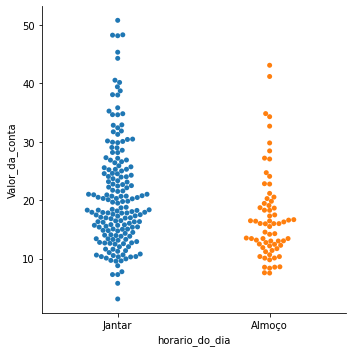

In [52]:
sns.catplot(x = 'horario_do_dia', y = 'Valor_da_conta', kind = 'swarm', data = gorjetas)

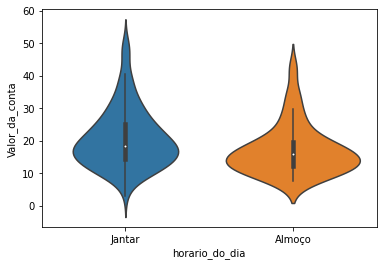

In [53]:
sns.violinplot(x = 'horario_do_dia', y = 'Valor_da_conta',  data = gorjetas)

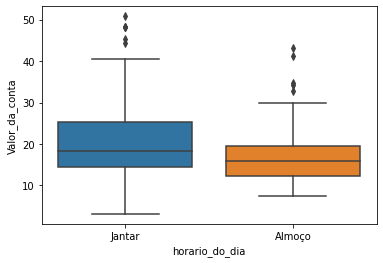

In [54]:
sns.boxplot(x = 'horario_do_dia', y = 'Valor_da_conta',  data = gorjetas)

In [67]:
valor_conta_jantar = gorjetas.query("horario_do_dia == 'Jantar'").Valor_da_conta
valor_conta_Almoço = gorjetas.query("horario_do_dia == 'Almoço'").Valor_da_conta

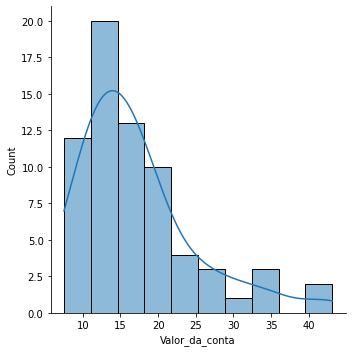

In [60]:
sns.displot(valor_conta_Almoço, kde=True)

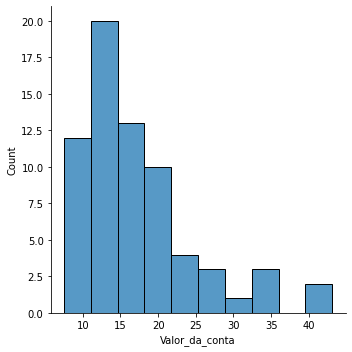

In [62]:
sns.displot(valor_conta_Almoço)

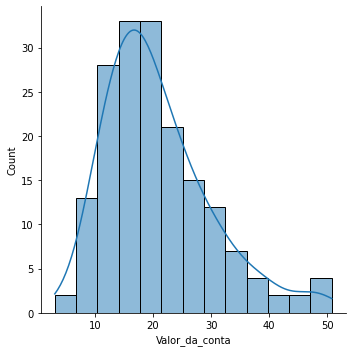

In [68]:
sns.displot(valor_conta_jantar, kde=True)

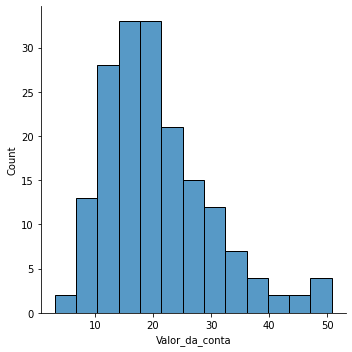

In [69]:
sns.displot(valor_conta_jantar  )

In [72]:
gorjetas.groupby('horario_do_dia').mean()[['Valor_da_conta', 'gorjeta', 'porcentagem']]

,Valor_da_conta,gorjeta,porcentagem
horario_do_dia,,,
Almoço,17.168676,2.728088,0.163971
Jantar,20.797159,3.102670,0.159773


# Hipótese

**H<sup>null</sup>**

> A distribuição do valor da conta é igual no almoço e na Janta

**H<sup>alt</sup>**

>  A distribuição do valor da conta não é igual no almoço e na Janta

In [74]:
porcentagem_jantar = gorjetas.query("horario_do_dia == 'Jantar'").porcentagem
porcentagem_Almoço = gorjetas.query("horario_do_dia == 'Almoço'").porcentagem

r3 = ranksums(porcentagem_jantar, porcentagem_Almoço)

In [77]:
print('O valor do p-value é de {} ' .format(r3.pvalue))

O valor do p-value é de 0.2602493995587126 


**H<sup>null</sup>**

> A distribuição do valor da conta é igual no almoço e na Janta